In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from matplotlib import font_manager
import pandas as pd
import utils
from datetime import datetime
import numpy as np


c:\Users\agand\OneDrive\Escritorio\lakes\lake-algae-analysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import importlib
import utils

importlib.reload(utils)

<module 'utils' from 'c:\\Users\\agand\\OneDrive\\Escritorio\\lakes\\lake-algae-analysis\\notebooks\\utils.py'>

In [3]:
universities = pd.read_csv(f"{utils.get_data_directory()}/Universities.csv", encoding='ISO-8859-1')
lakes = pd.read_csv(f"{utils.get_data_directory()}/all_lakes.csv")

universities = universities.loc[:50]
universities = universities[['name', 'longitude', 'latitude']]

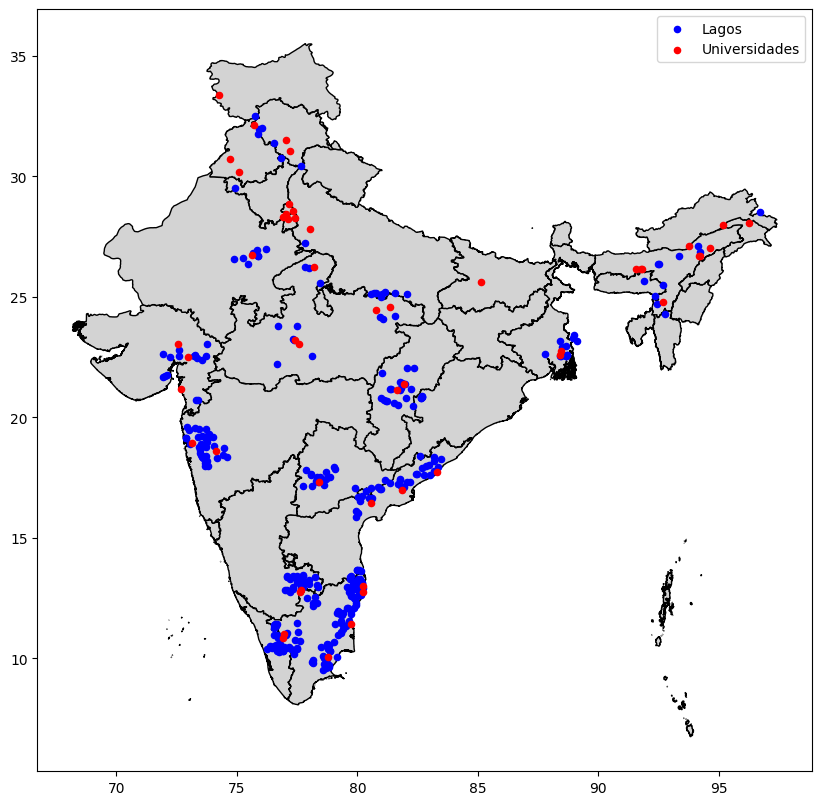

In [24]:
utils.plot_indian_lakes(universities, lakes)

In [3]:
chl_image = utils.get_image_from_lake(8421510,"chl" , datetime(2020, 6, 13), 5)

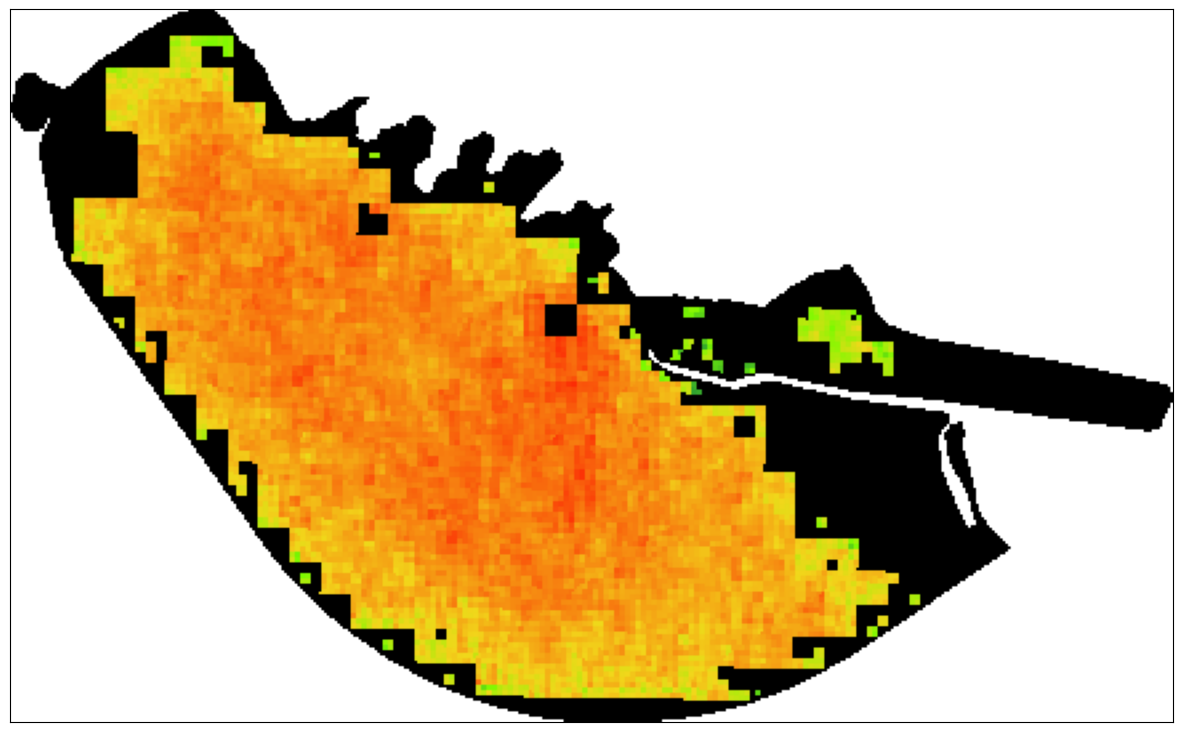

In [4]:
utils.plot_image(chl_image)

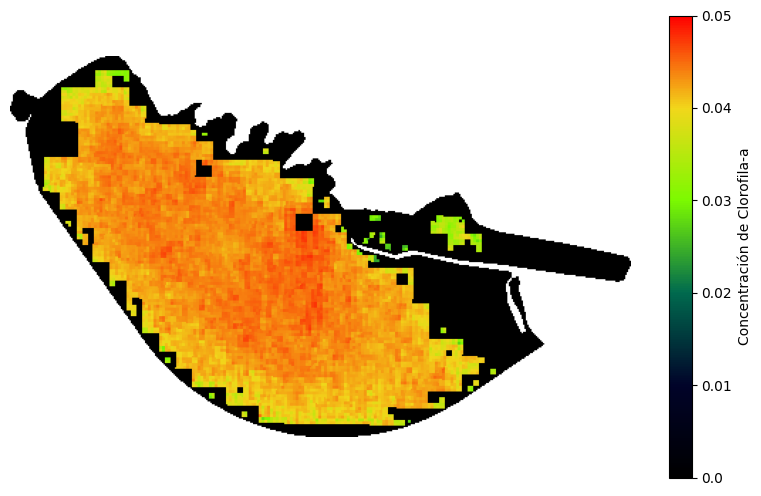

In [13]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Definir la escala de colores
colors = [
    [0, 0, 0],               # Negro para 0.0
    [0.0034, 0.0142, 0.163], # #01042A (almost black blue)
    [0, 0.416, 0.306],       # #006A4E (bangladesh green)
    [0.486, 0.98, 0],        # #7CFA00 (dark saturated chartreuse)
    [0.9465, 0.8431, 0.1048],# #F1D71B (light washed yellow)
    [1, 0, 0]                # #FF0000 (red)
]
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)

chl_image_normalized = (chl_image - chl_image.min()) / (chl_image.max() - chl_image.min())

plt.figure(figsize=(10, 6))
img = plt.imshow(chl_image_normalized, cmap=cmap, vmin=0, vmax=1)
cbar = plt.colorbar(img, label='Concentración de Clorofila-a')
cbar.set_ticks([0, 0.2, 0.4, 0.6,0.8, 1])
cbar.set_ticklabels(['0.0', '0.01', '0.02', '0.03', '0.04', '0.05'])
plt.axis('off')
plt.show()